# Exloratory Data Analysis

In [1]:
# import the necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Get working directory 
import os, sys
sys.path.append(os.path.abspath('..'))

In [3]:
import scripts.EDA as eda

### Load data

In [4]:
filepath= '../data/data/data.csv'
data = eda.load_data(filepath)

### Dataset Overview

In [5]:
# Data Preview
data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [6]:
eda.dataset_overview(data)

DataSet Overview

Number of Rows: 95662

Number of Columns: 16


Column Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null 

**Clean Data by removing unnecessay features in the input data**

In [7]:
columns_to_clean = ["TransactionId", "BatchId", "AccountId", "SubscriptionId", "CustomerId", "ProviderId", "ProductId", "ChannelId"]
def clean_column(column):
    return column.str.extract(r"_(\d+)$")[0]

for col in columns_to_clean:
    data[col] = clean_column(data[col])
    data[col] = pd.to_numeric(data[col])

data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,76871,36123,3957,887,4406,UGX,256,6,10,airtime,3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,73770,15642,4841,3829,4406,UGX,256,4,6,financial_services,2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,26203,53941,4229,222,4683,UGX,256,6,1,airtime,3,500.0,500,2018-11-15T02:44:21Z,2,0
3,380,102363,648,2185,988,UGX,256,1,21,utility_bill,3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,28195,38780,4841,3829,988,UGX,256,4,6,financial_services,2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [8]:
# Check Column Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  int64  
 1   BatchId               95662 non-null  int64  
 2   AccountId             95662 non-null  int64  
 3   SubscriptionId        95662 non-null  int64  
 4   CustomerId            95662 non-null  int64  
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  int64  
 8   ProductId             95662 non-null  int64  
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  int64  
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

### Summary Statistics 

In [9]:
# Numerical Column Summary Statistics 
data.describe()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,Value,PricingStrategy,FraudResult
count,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.0,95662.000000,95662.000000,95662.000000,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,70334.481581,70526.339173,3361.571648,3023.115845,3126.883590,256.0,4.657157,7.419069,2.622410,6.717846e+03,9.900584e+03,2.255974,0.002018
std,40626.774116,40586.254942,1560.040065,1293.973071,1650.972455,0.0,1.309014,4.655919,0.558568,1.233068e+05,1.231221e+05,0.732924,0.044872
min,1.000000,2.000000,1.000000,2.000000,1.000000,256.0,1.000000,1.000000,1.000000,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,35235.250000,35468.500000,2203.000000,2067.000000,1875.000000,256.0,4.000000,3.000000,2.000000,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,70319.500000,70614.000000,3919.000000,3829.000000,3124.000000,256.0,5.000000,6.000000,3.000000,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,105542.750000,105627.750000,4841.000000,3829.000000,4229.000000,256.0,6.000000,10.000000,3.000000,2.800000e+03,5.000000e+03,2.000000,0.000000
max,140681.000000,139493.000000,4841.000000,4836.000000,7479.000000,256.0,6.000000,27.000000,5.000000,9.880000e+06,9.880000e+06,4.000000,1.000000


In [10]:
# Categorical column summary statistics
data.describe(include=['object'])

,CurrencyCode,ProductCategory,TransactionStartTime
count,95662,95662,95662
unique,1,9,94556
top,UGX,financial_services,2018-12-24T16:30:13Z
freq,95662,45405,17


In [11]:
# Summary statistics of all columns
print("Summary statistics of all columns")
data.describe(include='all').T

Summary statistics of all columns


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionId,95662.0,NaN,NaN,NaN,70334.481581,40626.774116,1.0,35235.25,70319.5,105542.75,140681.0
BatchId,95662.0,NaN,NaN,NaN,70526.339173,40586.254942,2.0,35468.5,70614.0,105627.75,139493.0
AccountId,95662.0,NaN,NaN,NaN,3361.571648,1560.040065,1.0,2203.0,3919.0,4841.0,4841.0
SubscriptionId,95662.0,NaN,NaN,NaN,3023.115845,1293.973071,2.0,2067.0,3829.0,3829.0,4836.0
CustomerId,95662.0,NaN,NaN,NaN,3126.88359,1650.972455,1.0,1875.0,3124.0,4229.0,7479.0
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,0.0,256.0,256.0,256.0,256.0,256.0
ProviderId,95662.0,NaN,NaN,NaN,4.657157,1.309014,1.0,4.0,5.0,6.0,6.0
ProductId,95662.0,NaN,NaN,NaN,7.419069,4.655919,1.0,3.0,6.0,10.0,27.0
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Numerical Feature Distribution

In [12]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

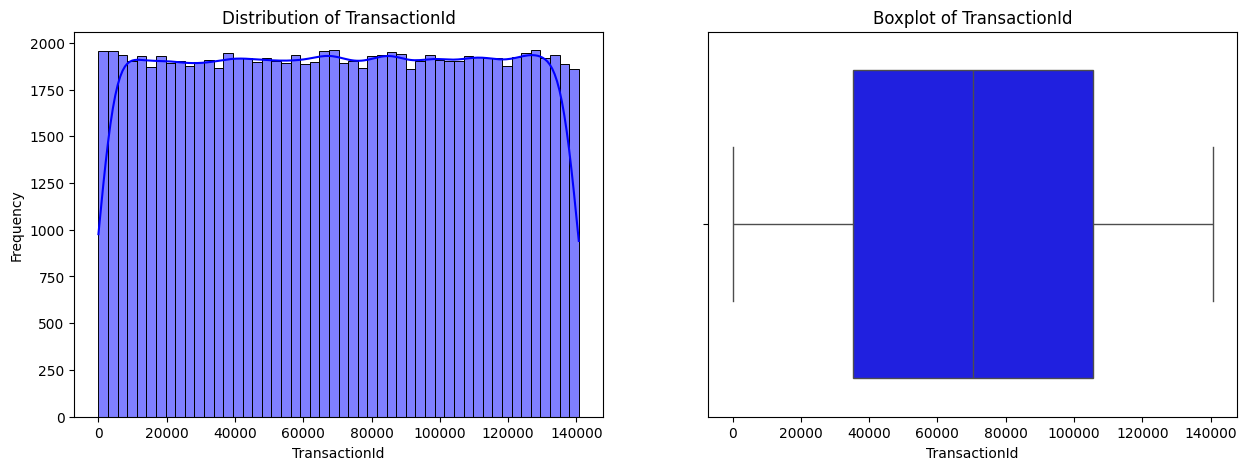

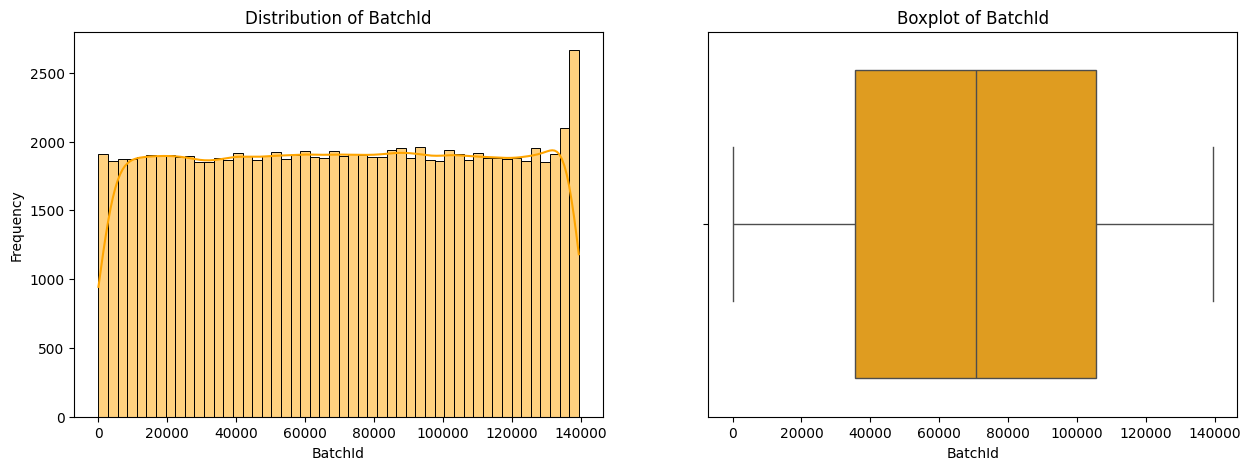

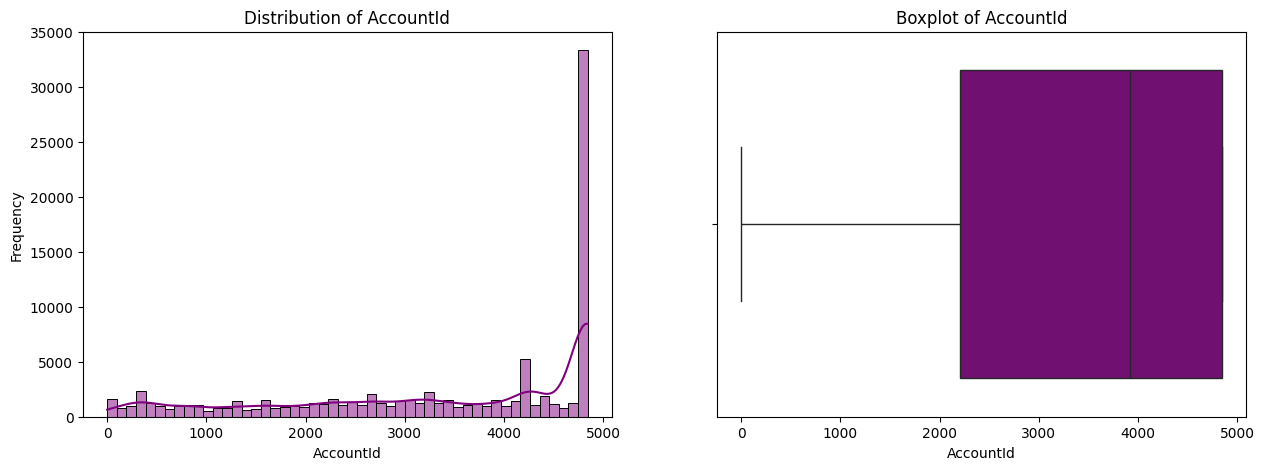

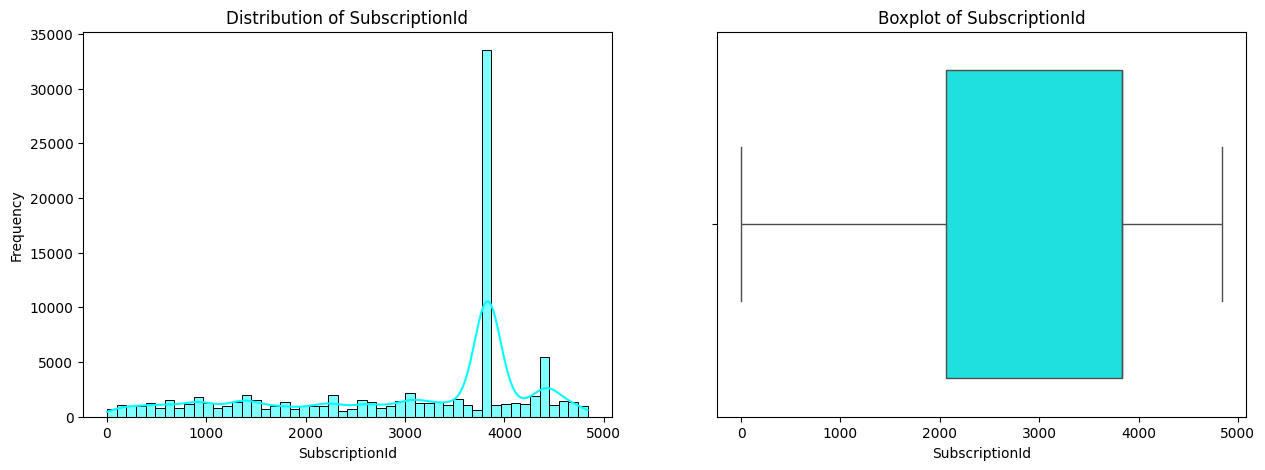

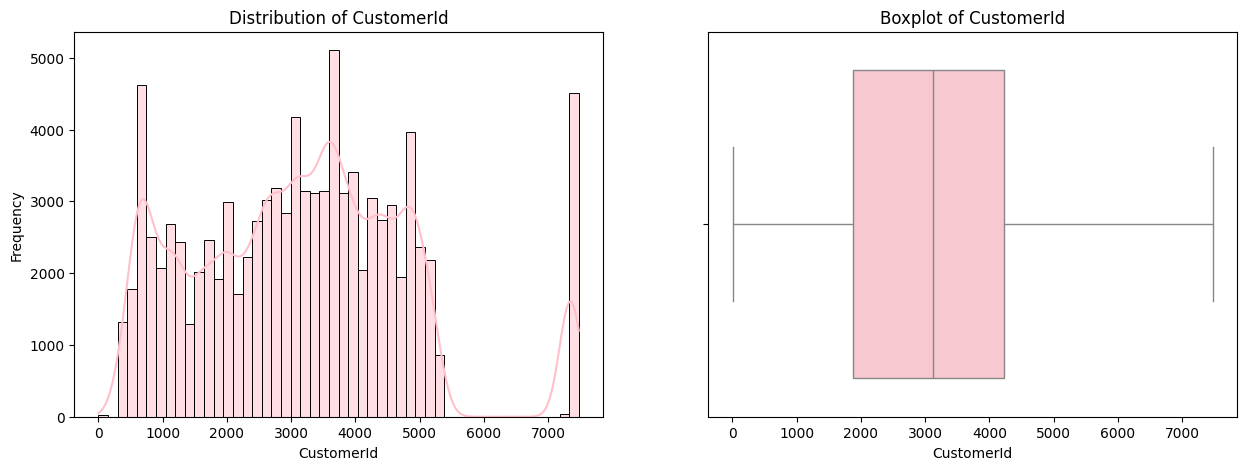

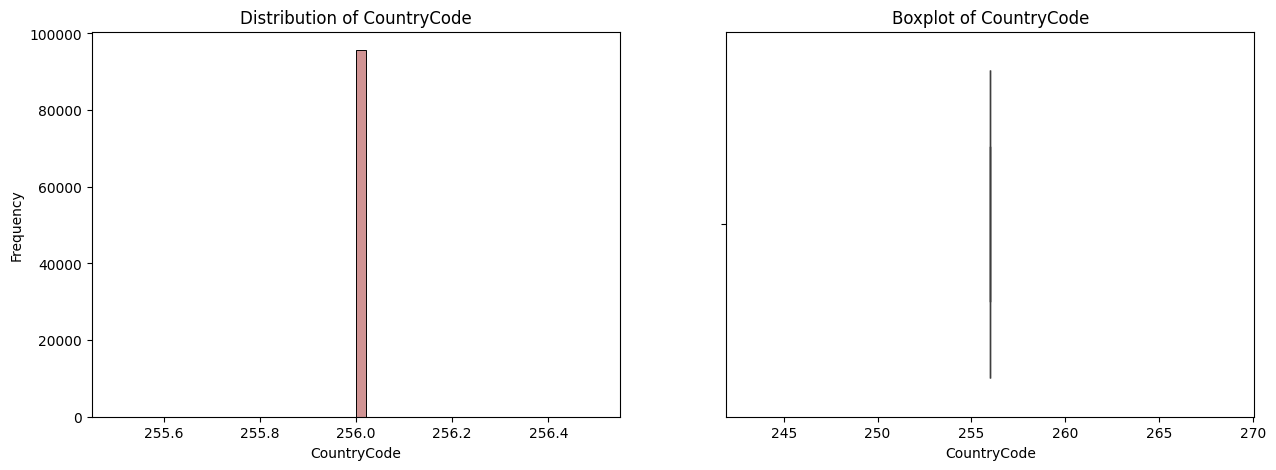

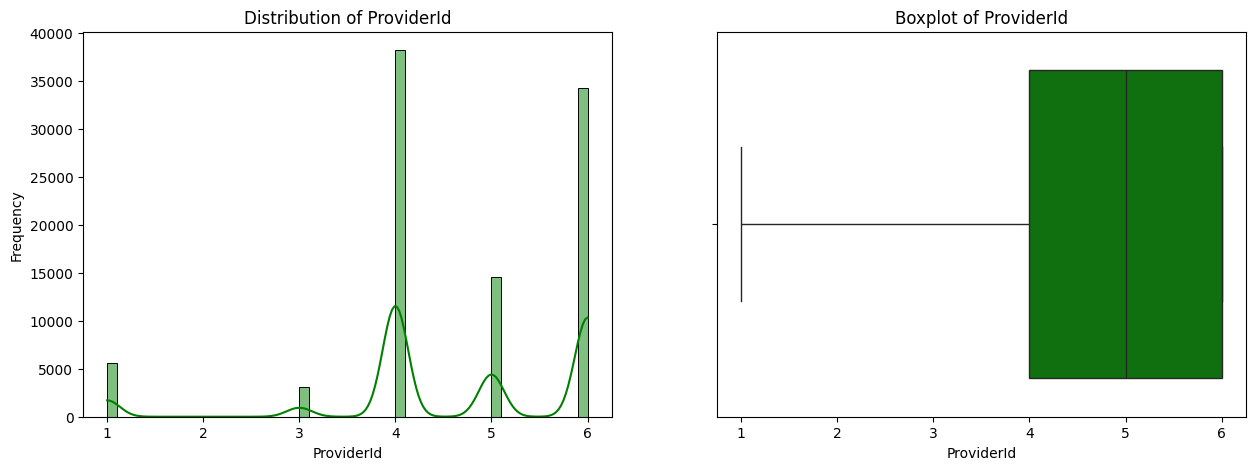

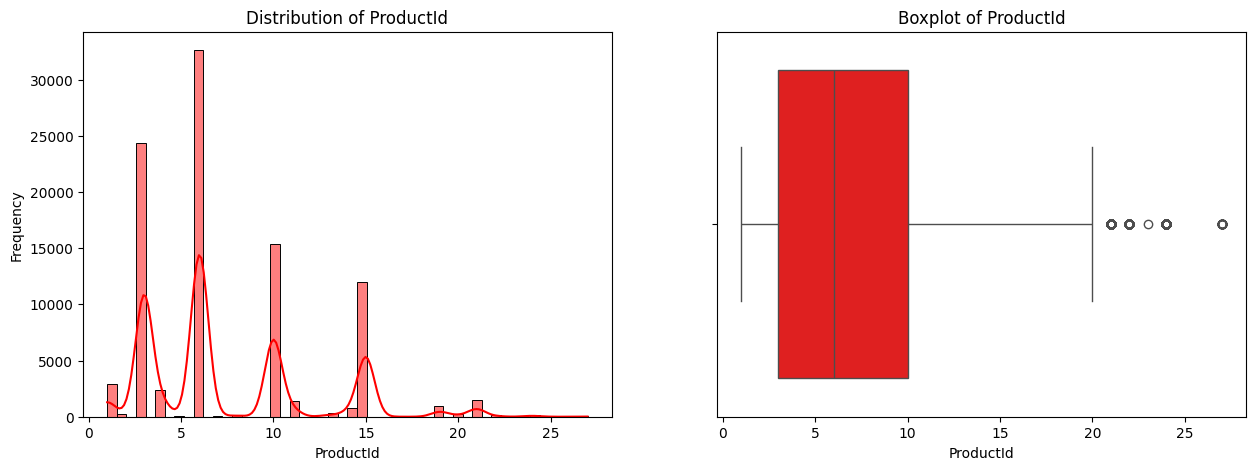

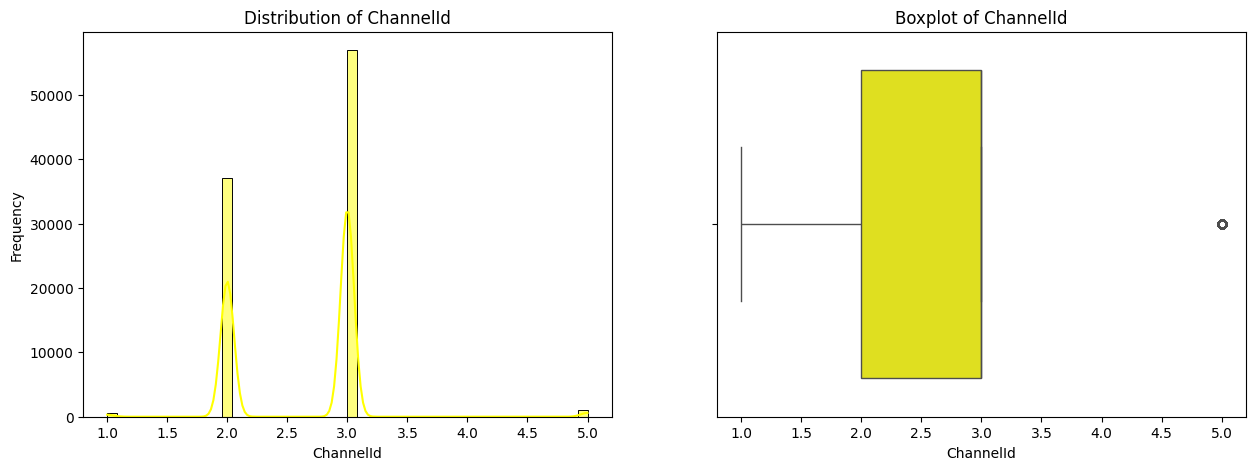

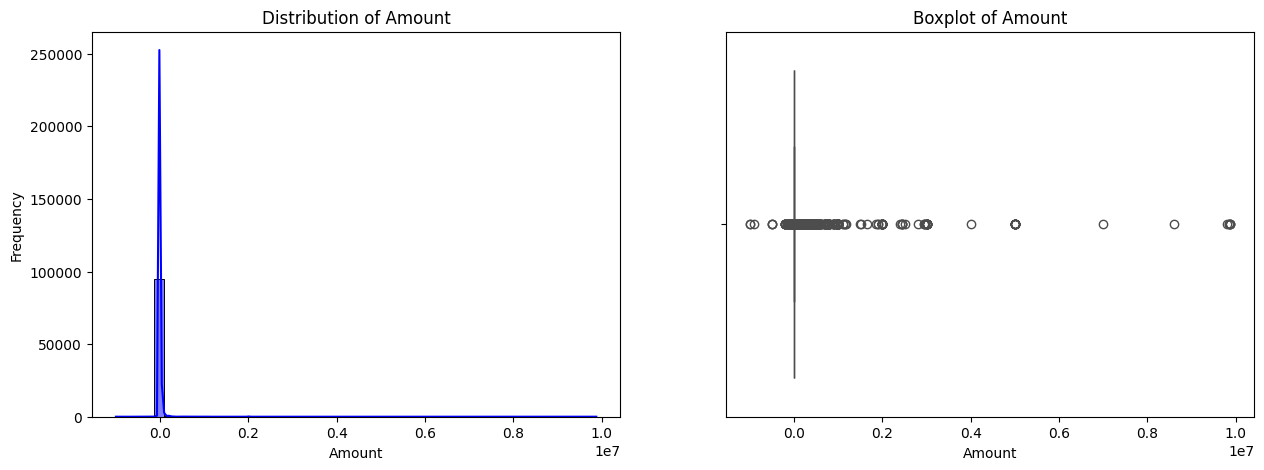

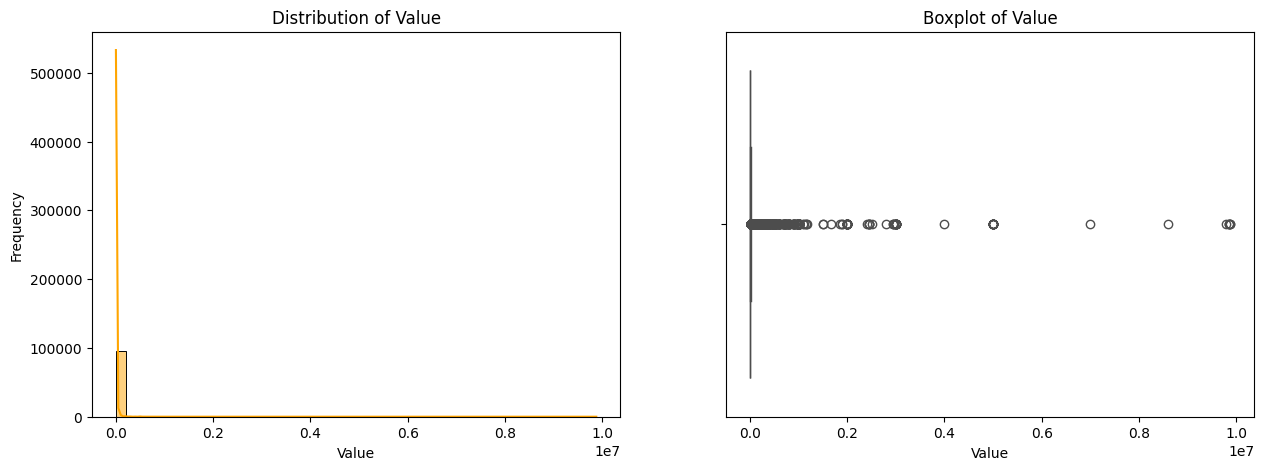

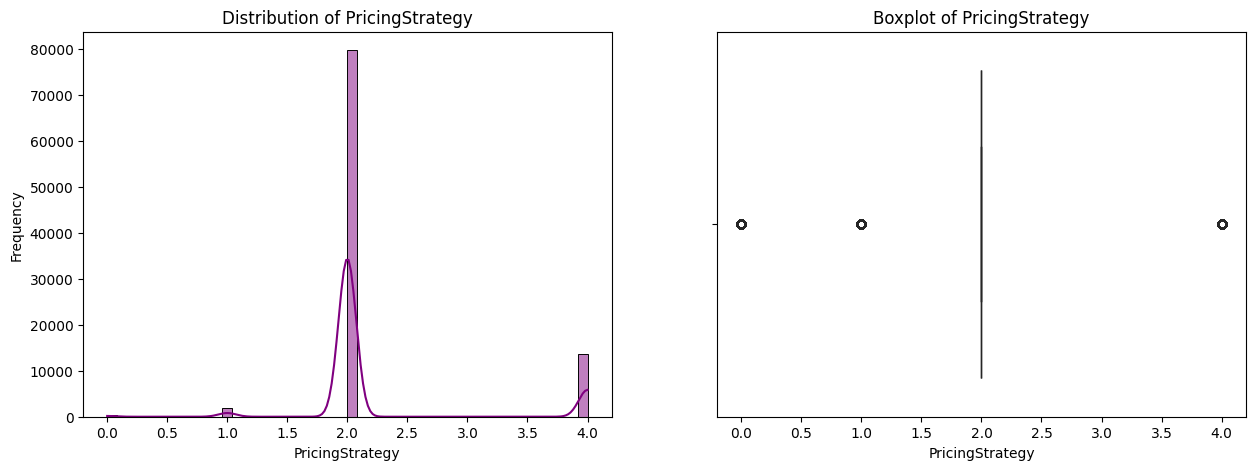

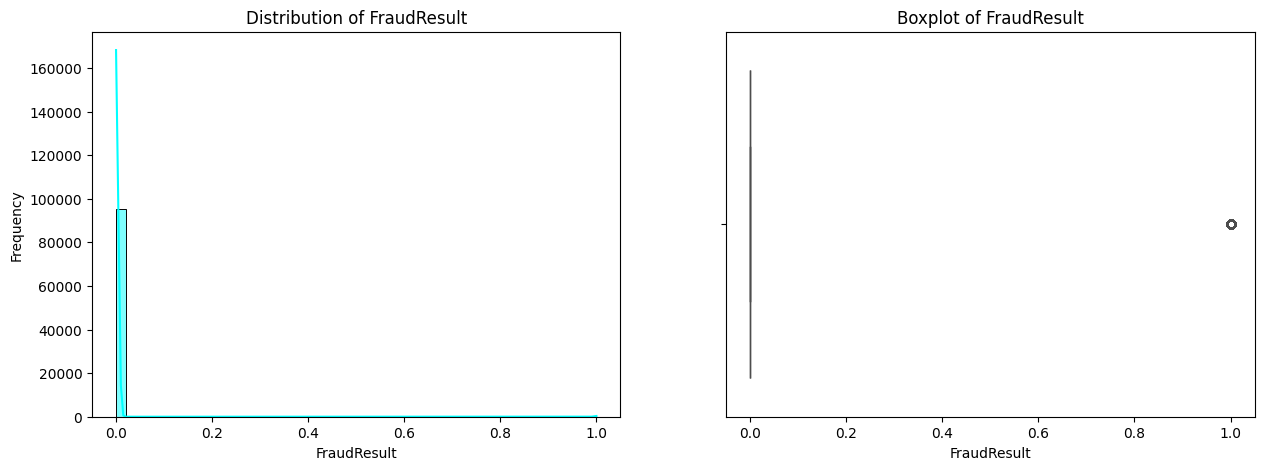

In [13]:
# visualize numerical feature distributions

eda.visualize_numerical_distributions(data)

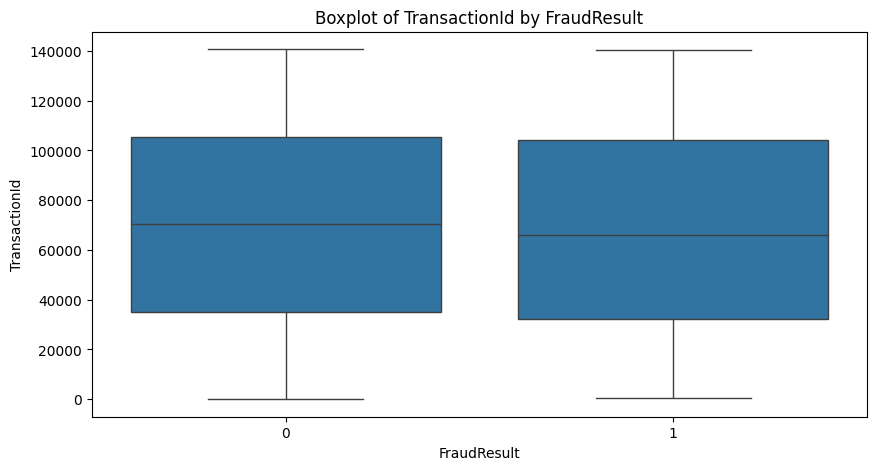

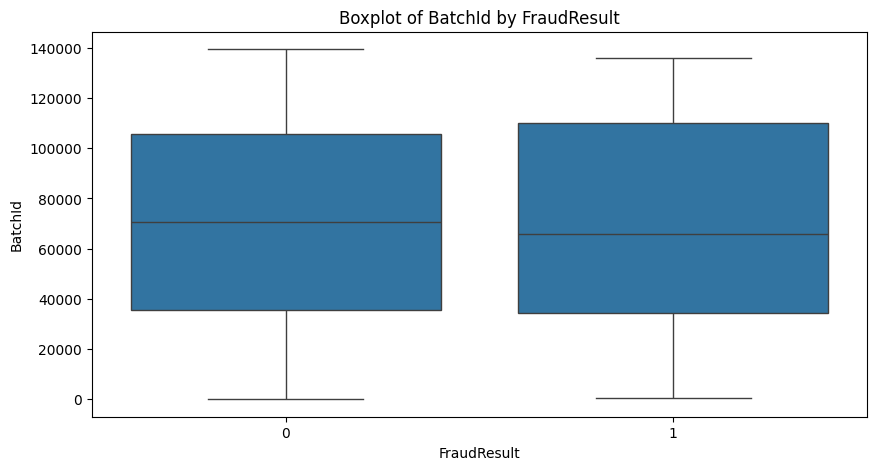

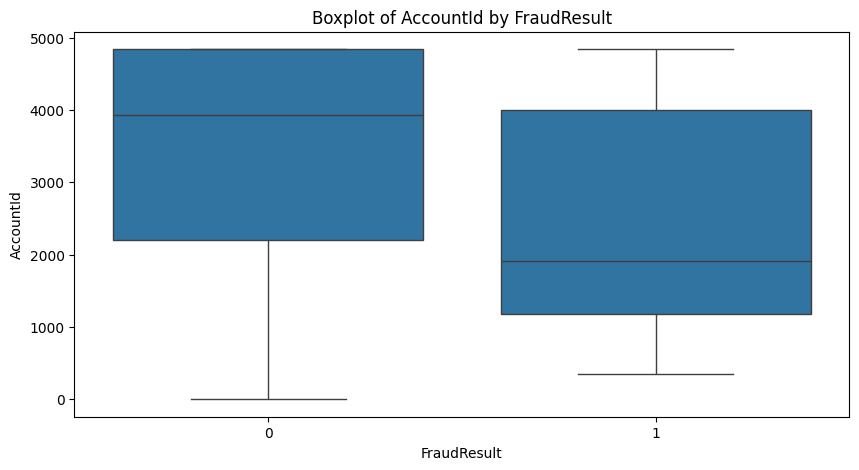

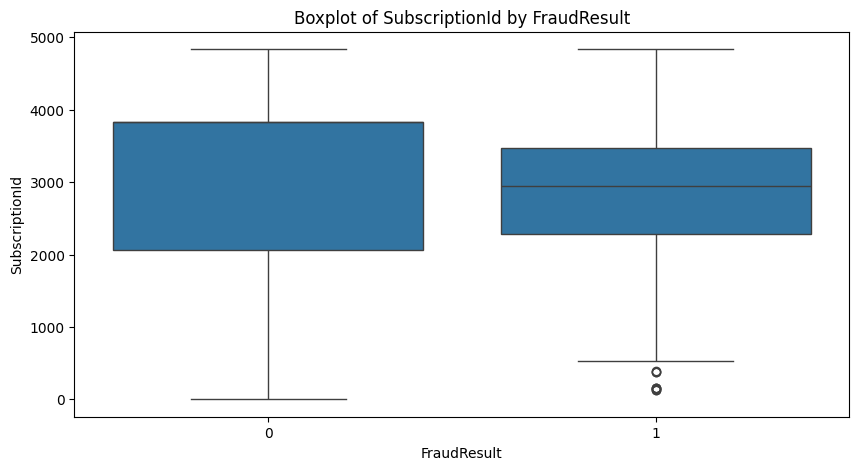

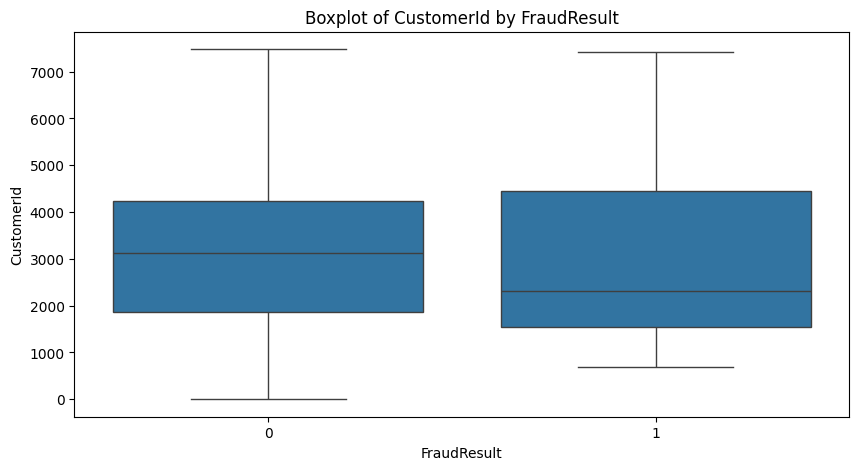

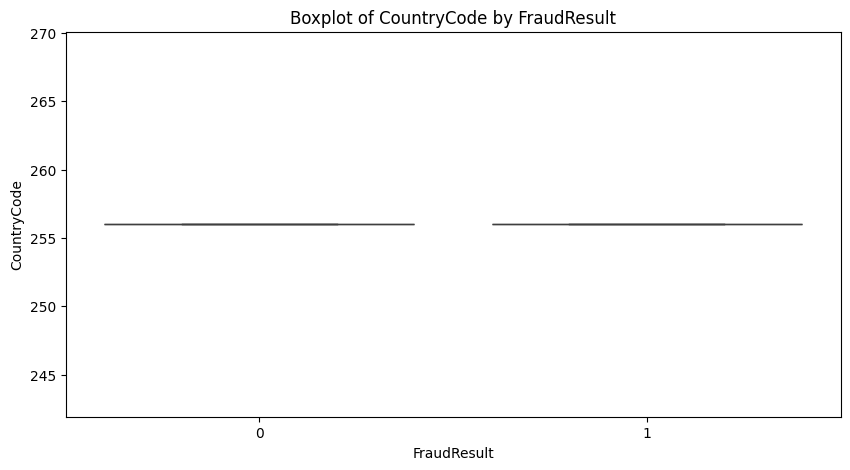

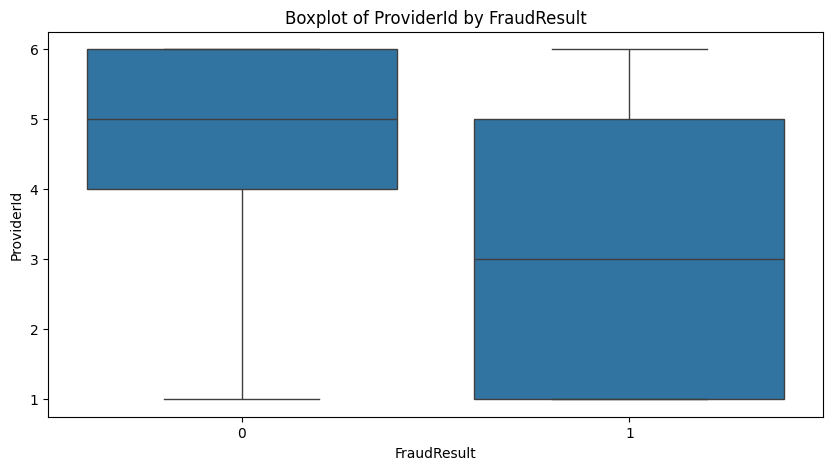

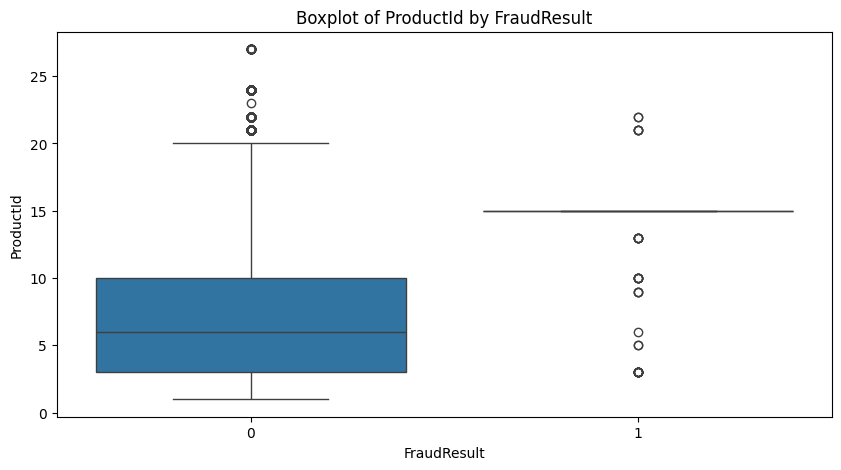

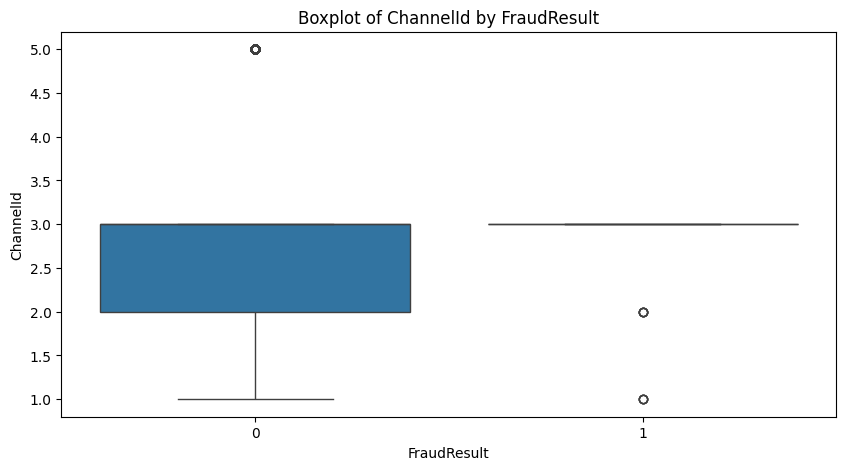

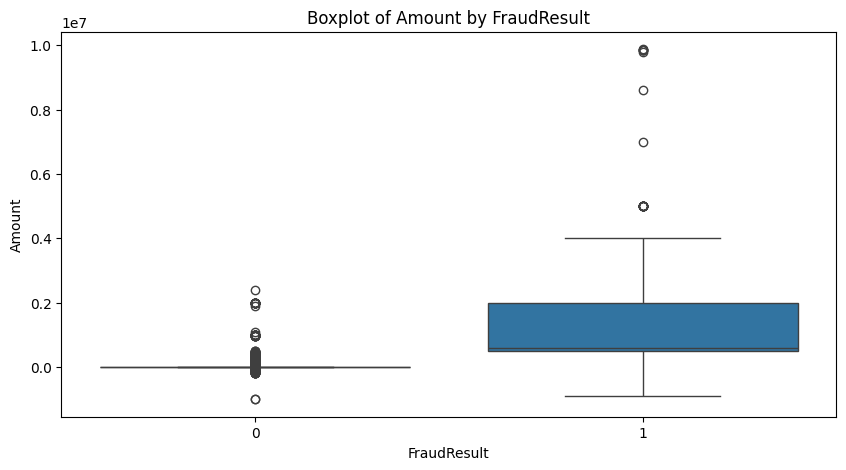

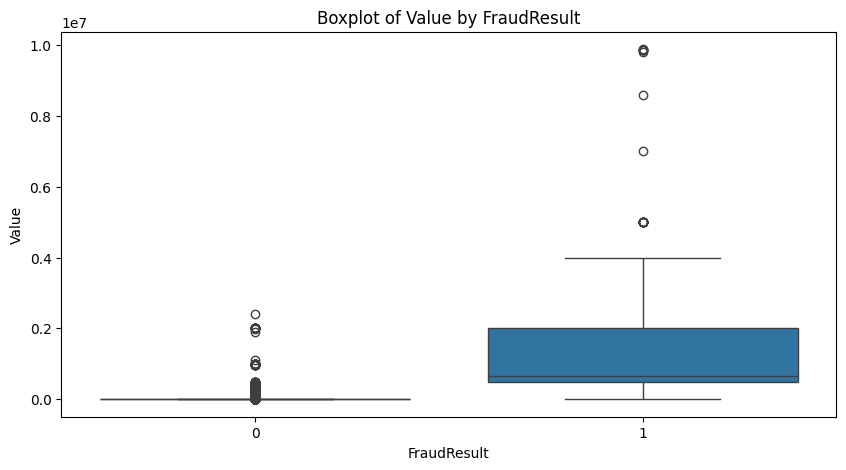

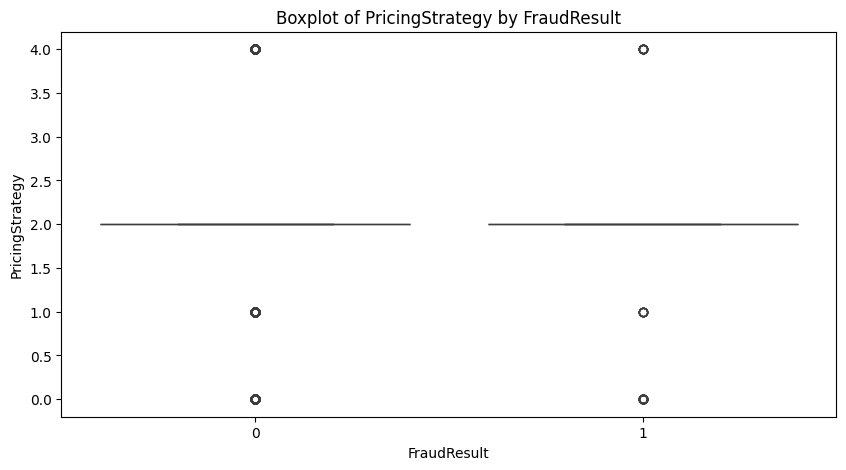

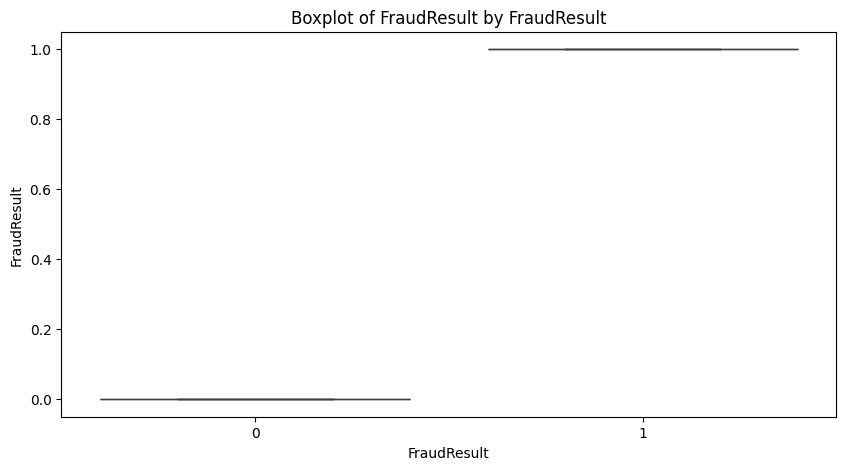

In [14]:
# boxplot of the numerical features with FraudResult
eda.plot_numerical_boxplot(data, numerical_columns, 'FraudResult')

### Top User

**Top Customers on Platform**

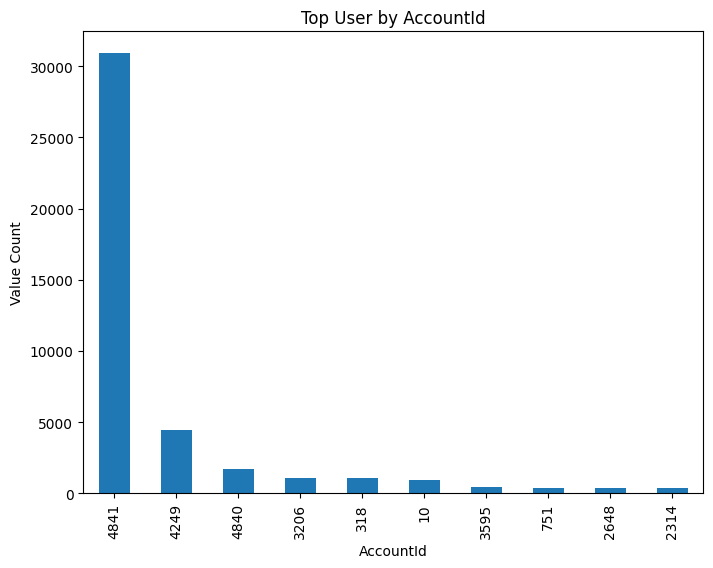

In [15]:
# Top customers by Account Id 
eda.top_user_plot(data, 'AccountId')

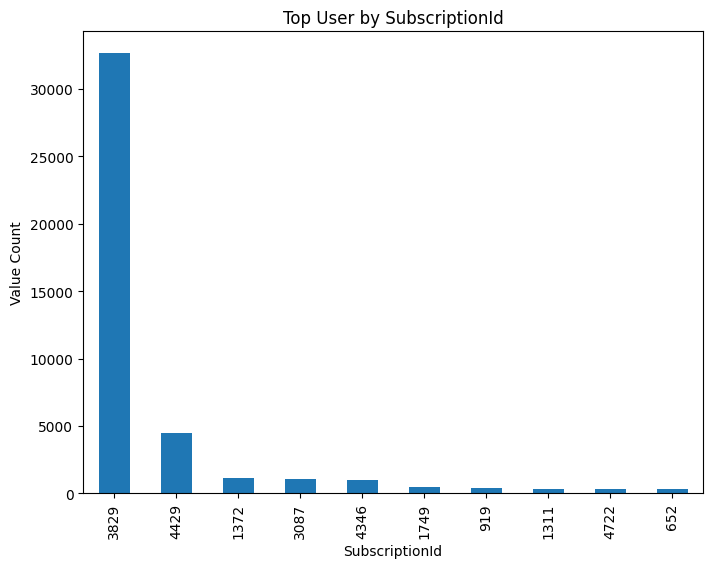

In [16]:
# Top Customers by Subscription Id
eda.top_user_plot(data, 'SubscriptionId')

Top Product type bought by Customers 

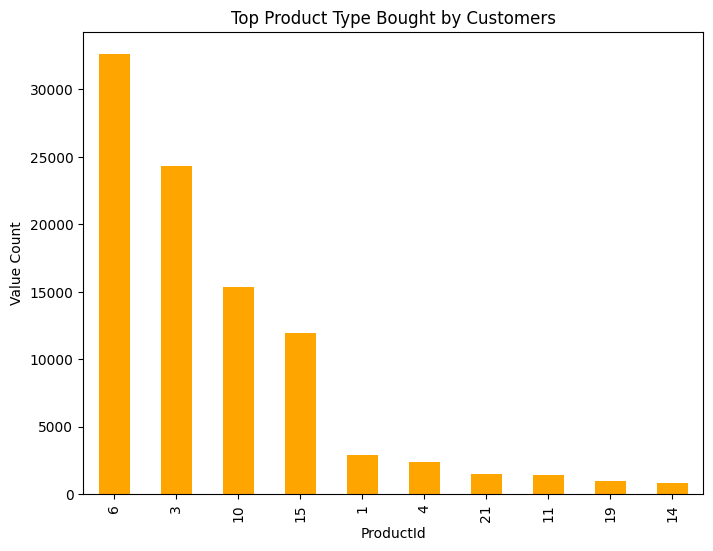

In [17]:
# Top product by Product Id
eda.top_product_plot(data, 'ProductId')

Fraud Result by Provider Id 
* **Proveder Id** is source for item bought

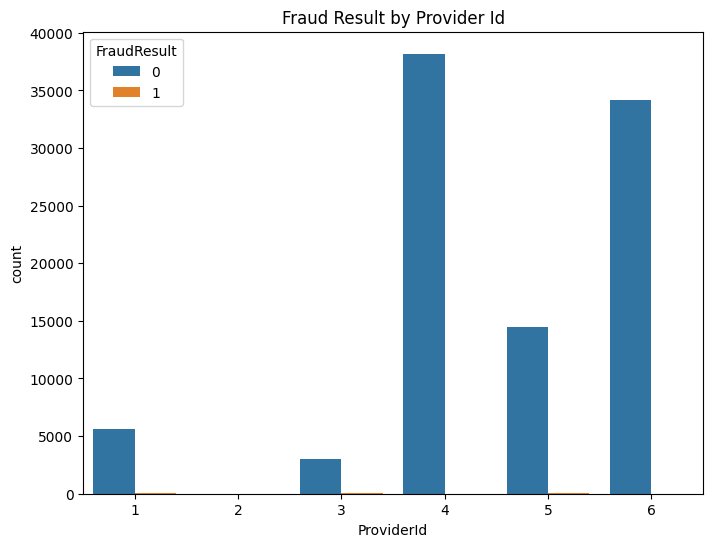

In [18]:
eda.fraud_result_by_providerid(data, 'ProviderId')

### Categorical Features Distribution 

In [19]:
categorical_columns = data.select_dtypes(include=['object']).columns

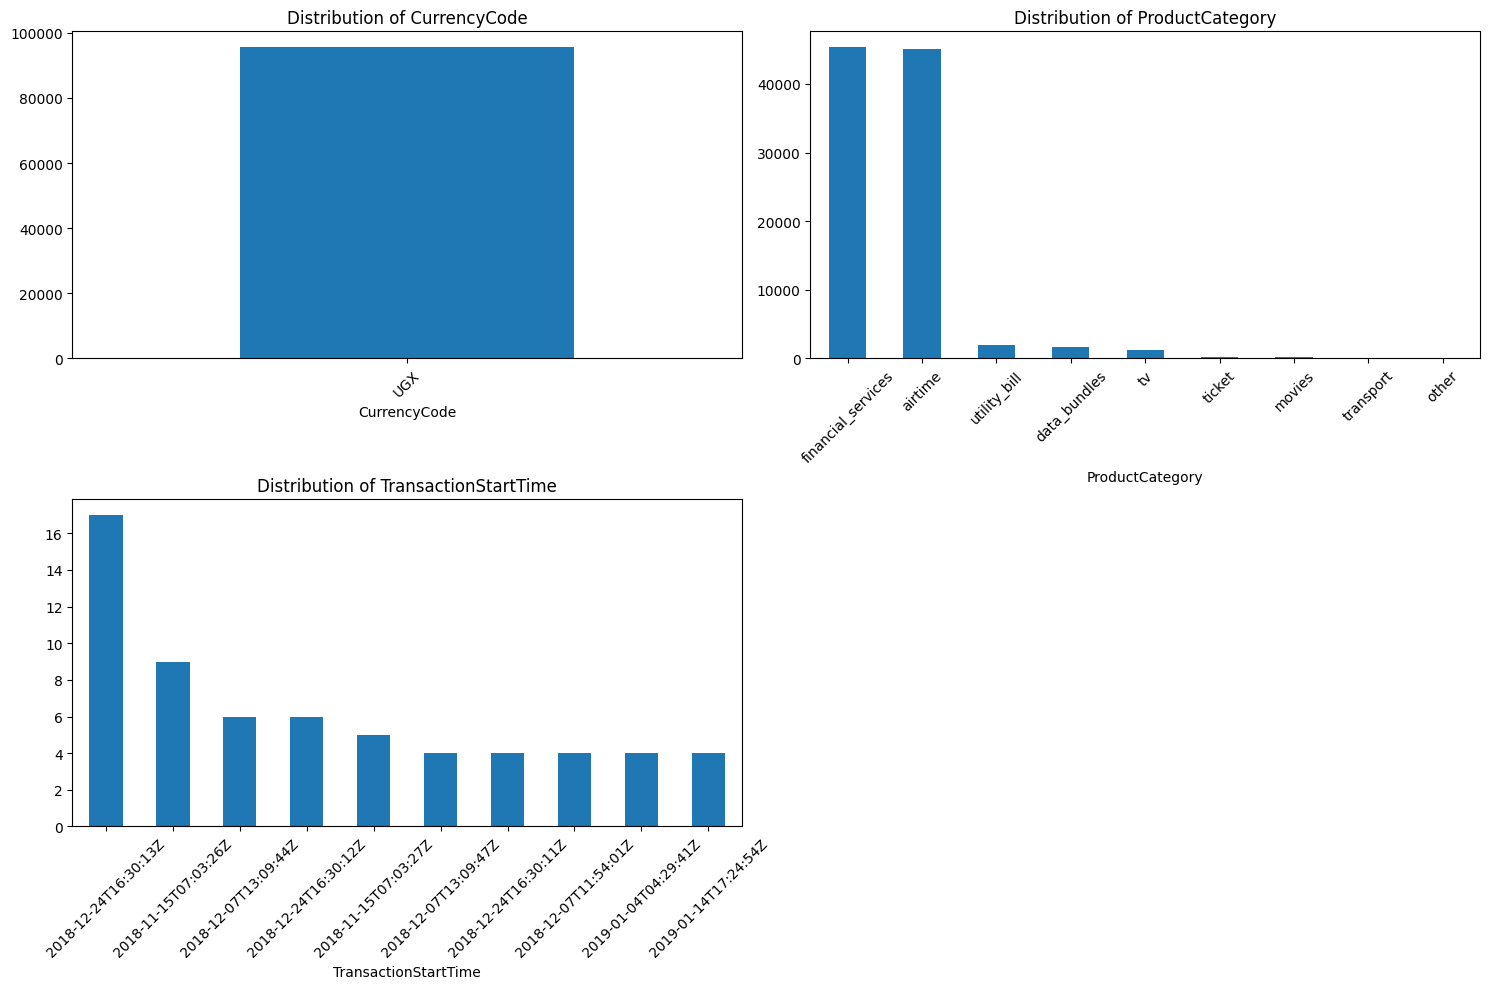

In [20]:
eda.categorical_feature_plot(data)

### Correlation analysis

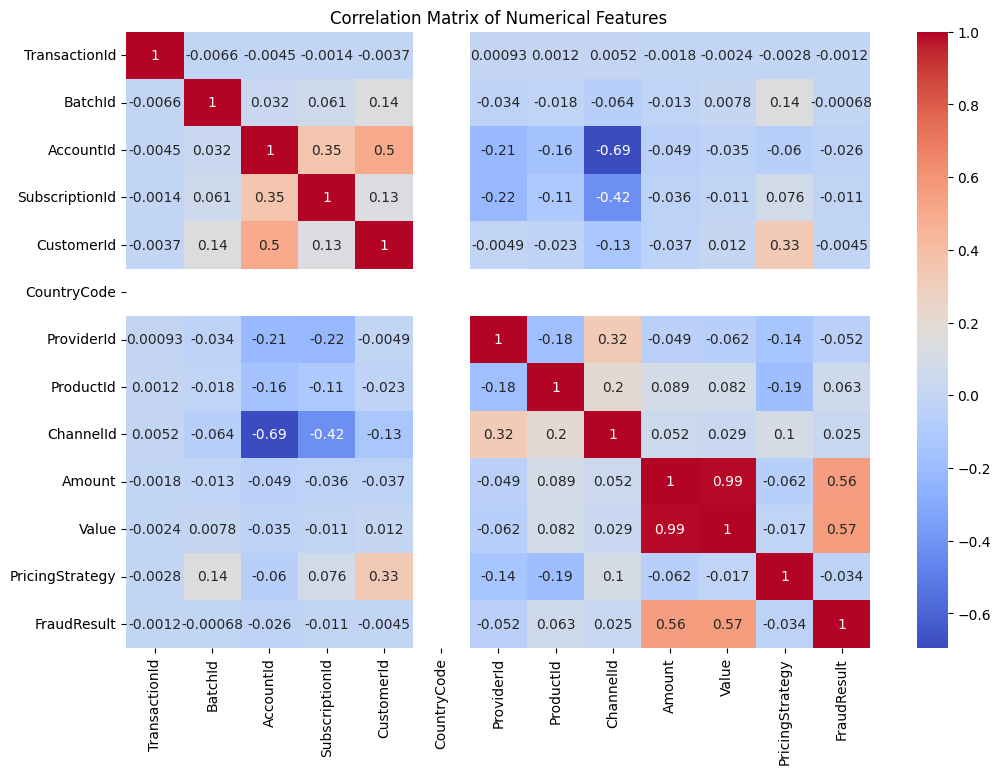

In [21]:
eda.corr_matrix(data)

### Check for missing Value

In [22]:
data.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

There is no missing value in the given data

### Save proccessed Data

In [24]:
data.to_csv('../data/customers_data.csv', index=False)